In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from extract_features import extract_mfcc, load_data

In [2]:
X, y = load_data('json data.json')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 92, 12)
(100,)
(67, 92, 12)
(67,)


In [4]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors': [2, 3, 5, 7, 8, 9, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

clf = GridSearchCV(KNeighborsClassifier(), grid_params, cv = 3, scoring = 'accuracy')
clf.fit(X_train, y_train)
print(f'best params: {clf.best_params_}')
print(f'accuracy: {clf.best_score_}')
print(f'classifier: {clf.best_estimator_}')

best params: {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
accuracy: 0.9699940582293524
classifier: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


In [6]:
y_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       0.17      0.50      0.25         2
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        10
           6       1.00      0.55      0.71        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         9

    accuracy                           0.91        67
   macro avg       0.90      0.90      0.89        67
weighted avg       0.96      0.91      0.92        67



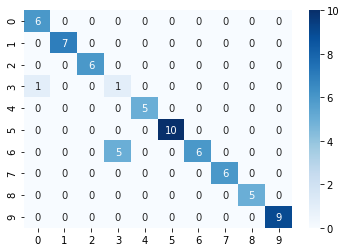

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_pred, y_test))
sns.heatmap(confusion_matrix(y_pred, y_test), annot = True, cmap='Blues')

In [37]:
import librosa
category = [
        "cua",
        "dong_co_may_bay_cat_canh",
        "dong_co_xe_may",
        "khoan",
        "may_bom_hoi",
        "may_cay",
        "may_dem_tien",
        "may_hut_bui",
        "may_say",
        "quat_suoi"
]
file = 'test data/cua_test2.wav'
mfcc = extract_mfcc(file)
mfcc = mfcc.reshape(1, -1)
print(category[clf.best_estimator_.predict(mfcc)[0]])
#print(clf.best_estimator_.kneighbors(mfcc, n_neighbors = 3, return_distance = False))

cua


In [12]:
with open('json data.json', 'r') as fp:
    my_data = json.load(fp)
X = np.array(my_data['mfcc'])
y = np.array(my_data['labels'])
X = X.reshape(X.shape[0], -1)
kNearest = clf.best_estimator_
kNearest.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [38]:
import IPython.display as ipd
#file = 'test data/quat_suoi_test1.wav'
mfcc = extract_mfcc(file)
mfcc = mfcc.reshape(1, -1)
ipd.display(ipd.Audio(file))
list_index = kNearest.kneighbors(mfcc, n_neighbors=3, return_distance = False).squeeze()
for index in list_index:
    print(my_data['category'][my_data['labels'][index]], my_data['path'][index])
    ipd.display(ipd.Audio(my_data['path'][index]))

cua raw data/cua\cua_04(mp3cut.net).wav


cua raw data/cua\cua_10(mp3cut (mp3cut.net).wav


cua raw data/cua\cua_14(mp3cut (mp3cut.net).wav
